In [ ]:
# install rdkit  
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y -c rdkit rdkit python=3.7
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import pprint     
pprint.pprint(sys.path)
!python -c "import site; print (site.getsitepackages())"

In [2]:
import pandas as pd
df = pd.read_csv('top_20_MOAs.txt', sep = '\t')
df

,SMILES,MOA
0,CCCC(=O)Nc1ccc(OCC(O)CNC(C)C)c(c1)C(C)=O,adrenergic receptor antagonist
1,COc1cc2nc(nc(N)c2cc1OC)N(C)CCCNC(=O)C1CCCO1,adrenergic receptor antagonist
2,CC(C)NCC(O)COc1ccccc1CC=C,adrenergic receptor antagonist
3,COc1ccccc1N1CCN(CCN2C(=O)c3ccccc3C(C)(C)C2=O)CC1,adrenergic receptor antagonist
4,CC(C)(C)NCC(O)CSc1nc(cs1)-c1ccc(s1)C(N)=O,adrenergic receptor antagonist
...,...,...
1216,OCCCC(O)=O,benzodiazepine receptor agonist
1217,CN1c2ccc(Cl)cc2C(=NC(O)C1=O)c1ccccc1,benzodiazepine receptor agonist
1218,CCN(C(C)=O)c1cccc(c1)-c1ccnc2c(cnn12)C#N,benzodiazepine receptor agonist
1219,CCOC(=O)c1ncc2[nH]c3ccc(OCc4ccccc4)cc3c2c1COC,benzodiazepine receptor agonist


In [3]:
# check the duplicates 
for i in df.SMILES.tolist():
  if df.SMILES.tolist().count(i) != 1:
    print(i)

In [4]:
MOA_class_dictionary = {'EGFR inhibitor': 8,
 'HDAC inhibitor': 16,
 'PI3K inhibitor': 13,
 'acetylcholine receptor agonist': 1,
 'acetylcholine receptor antagonist': 4,
 'adrenergic receptor agonist': 18,
 'adrenergic receptor antagonist': 15,
 'bacterial cell wall synthesis inhibitor': 14,
 'benzodiazepine receptor agonist': 10,
 'calcium channel blocker': 5,
 'cyclooxygenase inhibitor': 6,
 'dopamine receptor antagonist': 12,
 'glucocorticoid receptor agonist': 9,
 'glutamate receptor antagonist': 19,
 'histamine receptor antagonist': 17,
 'phosphodiesterase inhibitor': 3,
 'serotonin receptor agonist': 7,
 'serotonin receptor antagonist': 2,
 'sodium channel blocker': 11,
 'topoisomerase inhibitor': 0}

In [5]:
sorted_classes = list(MOA_class_dictionary.values())
sorted_classes.sort() 
assert sorted_classes == [i for i in range(20)]

In [6]:
# add classes column 
df['classes'] = None
for i in range(df.shape[0]):
  df.iloc[i,2] = MOA_class_dictionary[df.iloc[i,1]]
df

,SMILES,MOA,classes
0,CCCC(=O)Nc1ccc(OCC(O)CNC(C)C)c(c1)C(C)=O,adrenergic receptor antagonist,15
1,COc1cc2nc(nc(N)c2cc1OC)N(C)CCCNC(=O)C1CCCO1,adrenergic receptor antagonist,15
2,CC(C)NCC(O)COc1ccccc1CC=C,adrenergic receptor antagonist,15
3,COc1ccccc1N1CCN(CCN2C(=O)c3ccccc3C(C)(C)C2=O)CC1,adrenergic receptor antagonist,15
4,CC(C)(C)NCC(O)CSc1nc(cs1)-c1ccc(s1)C(N)=O,adrenergic receptor antagonist,15
...,...,...,...
1216,OCCCC(O)=O,benzodiazepine receptor agonist,10
1217,CN1c2ccc(Cl)cc2C(=NC(O)C1=O)c1ccccc1,benzodiazepine receptor agonist,10
1218,CCN(C(C)=O)c1cccc(c1)-c1ccnc2c(cnn12)C#N,benzodiazepine receptor agonist,10
1219,CCOC(=O)c1ncc2[nH]c3ccc(OCc4ccccc4)cc3c2c1COC,benzodiazepine receptor agonist,10


In [7]:
# A function that changes smiles string to fingerprints 
import rdkit
import numpy as np
from rdkit import *
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
def smiles_to_array_to_string(smiles):
  molecules = Chem.MolFromSmiles(smiles) 
  fingerprints = AllChem.GetMorganFingerprintAsBitVect(molecules, 2)
  x_array = []
  arrays  = np.zeros(0,)
  DataStructs.ConvertToNumpyArray(fingerprints, arrays)
  x_array.append(arrays)
  x_array = np.asarray(x_array)
  x_array = list((np.squeeze(x_array)).astype(int))
  string = ''
  for i in x_array:
    string += str(i) 
  return string

In [8]:
# Check the existence of Isomers
assert len(set([smiles_to_array_to_string(i) for i in df.SMILES.tolist()])) == df.shape[0]

In [9]:
df.head(3)

,SMILES,MOA,classes
0,CCCC(=O)Nc1ccc(OCC(O)CNC(C)C)c(c1)C(C)=O,adrenergic receptor antagonist,15
1,COc1cc2nc(nc(N)c2cc1OC)N(C)CCCNC(=O)C1CCCO1,adrenergic receptor antagonist,15
2,CC(C)NCC(O)COc1ccccc1CC=C,adrenergic receptor antagonist,15


In [10]:
# Split out the test set  
from sklearn.model_selection import train_test_split
x_train_valid, x_test, y_train_valid, y_test = train_test_split(df.SMILES, df.classes, test_size =10/100,
 stratify = df.classes, shuffle = True, random_state = 1000)

In [11]:
# kfold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 9)
skf.get_n_splits(np.array(list(x_train_valid)), np.array(list(y_train_valid)))
train_index_list = []
valid_index_list = []
for train_index, valid_index in skf.split(np.array(list(x_train_valid)), np.array(list(y_train_valid))):
  train_index_list.append(train_index)
  valid_index_list.append(valid_index)

In [12]:
a_list = []
for i in range(9):
  a_list += list(np.array(list(x_train_valid))[valid_index_list[i]])

In [13]:
number_of_kfold = 0 # change the number from 0-8 to get 9 shuffles

In [14]:
  x_train = list(np.array(list(x_train_valid))[train_index_list[ number_of_kfold ]])
  x_valid = list(np.array(list(x_train_valid))[valid_index_list[ number_of_kfold ]])
  y_train = list(np.array(list(y_train_valid))[train_index_list[ number_of_kfold ]])
  y_valid = list(np.array(list(y_train_valid))[valid_index_list[ number_of_kfold ]])
  x_test = list(x_test)
  y_test = list(y_test)

In [15]:
# turn to cannoical  smiles
x_train = [Chem.MolToSmiles(Chem.MolFromSmiles(smi),True) for smi in x_train]
x_valid = [Chem.MolToSmiles(Chem.MolFromSmiles(smi),True) for smi in x_valid]
x_test = [Chem.MolToSmiles(Chem.MolFromSmiles(smi),True) for smi in x_test]

In [16]:
def smiles_to_array(smiles):
  molecules = Chem.MolFromSmiles(smiles) 
  fingerprints = AllChem.GetMorganFingerprintAsBitVect(molecules, 2)
  x_array = []
  arrays = np.zeros(0,)
  DataStructs.ConvertToNumpyArray(fingerprints, arrays)
  x_array.append(arrays)
  x_array = np.asarray(x_array)
  x_array = ((np.squeeze(x_array)).astype(int)) 
  return x_array

In [17]:
train_x = np.zeros((len(x_train), 2048), dtype = np.float32)
for f in range(train_x.shape[0]):
  train_x[f] = smiles_to_array(x_train[f])

In [18]:
valid_x = np.zeros((len(x_valid), 2048), dtype = np.float32)
for f in range(valid_x.shape[0]):
  valid_x[f] = smiles_to_array(x_valid[f])

In [19]:
test_x = np.zeros((len(x_test), 2048), dtype = np.float32)
for f in range(test_x.shape[0]):
  test_x[f] = smiles_to_array(x_test[f])

In [20]:
# Check if there are overlaps
overlap = []
for i in range(train_x.shape[0]):
  for j in range(valid_x.shape[0]):
    if np.array_equal(train_x[i], valid_x[j]) == True:
      overlap.append((i,j))
      print(i,j)

In [21]:
for i in range(test_x.shape[0]):
  for j in range(valid_x.shape[0]):
    if np.array_equal(test_x[i], valid_x[j]) == True:
      overlap.append((i,j))
      print(i,j)

In [22]:
for i in range(train_x.shape[0]):
  for j in range(test_x.shape[0]):
    if np.array_equal(train_x[i], test_x[j]) == True:
      overlap.append((i,j))
      print(i,j)

In [23]:
assert len(overlap) == 0

In [24]:
y_train = np.array(y_train).astype(int)
y_valid = np.array(y_valid).astype(int)
y_test = np.array(y_test).astype(int)

In [25]:
import gc               
gc.collect() 

132

In [26]:
# Create class weights
from sklearn.utils import class_weight
y_unique = np.unique(np.array(y_train))
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = y_unique,
                y = np.array(y_train)) 
class_weights_dict45 = dict(enumerate(class_weights))
class_weights_dict45

{0: 1.6266666666666667,
 1: 1.4352941176470588,
 2: 0.8872727272727273,
 3: 0.976,
 4: 0.7283582089552239,
 5: 1.3555555555555556,
 6: 0.6177215189873417,
 7: 0.9959183673469387,
 8: 1.525,
 9: 1.318918918918919,
 10: 1.7428571428571429,
 11: 1.5741935483870968,
 12: 0.976,
 13: 1.4352941176470588,
 14: 0.6506666666666666,
 15: 0.6506666666666666,
 16: 1.5741935483870968,
 17: 0.8714285714285714,
 18: 0.7283582089552239,
 19: 0.8133333333333334}

In [27]:
# The architecture of model      
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Dropout
num = len(set(df.MOA.tolist()))
input1 = Input(shape=(train_x.shape[1],))
layer = Dense(64, activation='relu')(input1)
layer = Dropout(0.85)(layer)
layer = Dense(num, activation='softmax')(layer)
model1 = Model(inputs = input1, outputs = layer)

In [28]:
from keras.callbacks import ModelCheckpoint
filepath_mlp = '/content/'+'MLP_20_MOA_weights.hdf5'
checkpoint_mlp = ModelCheckpoint(filepath_mlp, monitor='val_accuracy', verbose=0, save_best_only = True,
                mode = 'max')

In [29]:
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics = ['accuracy'])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor='val_loss', patience=25, verbose=0, mode='min')  
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                  factor=0.1, patience=7, verbose=0, min_delta=1e-119, mode='min')
history = model1.fit(train_x, y_train, validation_data=(valid_x, y_valid), class_weight=class_weights_dict45,
            shuffle=True, verbose=2, epochs=1800, batch_size=64,
            callbacks=[earlyStopping, checkpoint_mlp, reduce_lr_loss])

Epoch 1/1800


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


16/16 - 1s - loss: 3.0968 - accuracy: 0.0553 - val_loss: 2.9901 - val_accuracy: 0.0656 - lr: 1.0000e-04 - 1s/epoch - 63ms/step
Epoch 2/1800
16/16 - 0s - loss: 3.0633 - accuracy: 0.0461 - val_loss: 2.9782 - val_accuracy: 0.0656 - lr: 1.0000e-04 - 59ms/epoch - 4ms/step
Epoch 3/1800
16/16 - 0s - loss: 3.0498 - accuracy: 0.0748 - val_loss: 2.9666 - val_accuracy: 0.0738 - lr: 1.0000e-04 - 74ms/epoch - 5ms/step
Epoch 4/1800
16/16 - 0s - loss: 3.0358 - accuracy: 0.0615 - val_loss: 2.9552 - val_accuracy: 0.0820 - lr: 1.0000e-04 - 75ms/epoch - 5ms/step
Epoch 5/1800
16/16 - 0s - loss: 3.0030 - accuracy: 0.0645 - val_loss: 2.9449 - val_accuracy: 0.0984 - lr: 1.0000e-04 - 73ms/epoch - 5ms/step
Epoch 6/1800
16/16 - 0s - loss: 2.9830 - accuracy: 0.0758 - val_loss: 2.9345 - val_accuracy: 0.1148 - lr: 1.0000e-04 - 77ms/epoch - 5ms/step
Epoch 7/1800
16/16 - 0s - loss: 2.9973 - accuracy: 0.0686 - val_loss: 2.9247 - val_accuracy: 0.1230 - lr: 1.0000e-04 - 74ms/epoch - 5ms/step
Epoch 8/1800
16/16 - 0s - l

In [31]:
# Load the best model
from keras.models import load_model
best_model = load_model(filepath_mlp)

In [32]:
valid_accuracy = round(best_model.evaluate(valid_x, y_valid, verbose=0, batch_size=64)[1], 2)
valid_accuracy

0.67

In [33]:
# Evaluate the model 
from sklearn.metrics import classification_report
assert list(y_test)[0:5] == [14, 12, 6, 13, 14]
print(classification_report(y_valid, np.array(best_model.predict(valid_x).argmax(-1)),))
print(classification_report(y_test, np.array(best_model.predict(test_x).argmax(-1)),))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.60      0.75         5
           2       0.43      0.43      0.43         7
           3       0.62      0.83      0.71         6
           4       0.50      0.62      0.56         8
           5       1.00      0.40      0.57         5
           6       0.75      0.60      0.67        10
           7       0.43      0.50      0.46         6
           8       1.00      0.75      0.86         4
           9       1.00      0.75      0.86         4
          10       0.50      0.33      0.40         3
          11       0.40      0.50      0.44         4
          12       0.62      0.71      0.67         7
          13       0.67      1.00      0.80         4
          14       1.00      0.90      0.95        10
          15       0.67      0.60      0.63        10
          16       0.80      1.00      0.89         4
          17       0.75    

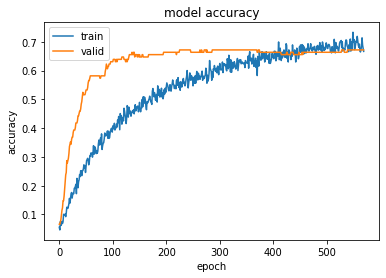

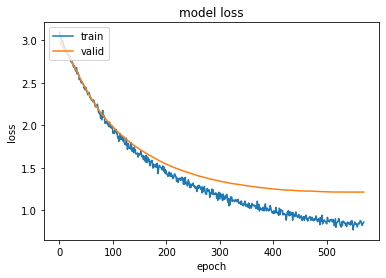

In [34]:
# Training curves
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc = 'upper left')
plt.show()

In [35]:
# References
# https://future-chem.com/rdkit-google-colab/#toc5
# https://www.rdkit.org/docs/index.html